In [2]:
!pip install alpha_vantage
!pip install plotly

     |████████████████████████████████| 643 kB 882 kB/s eta 0:00:01
     |████████████████████████████████| 123 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 2.2 MB/s eta 0:00:01
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 13.2 MB 932 kB/s eta 0:00:01
  Using cached retrying-1.3.3.tar.gz (10 kB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=999972e3a3e5ea1ea87032a539738dcc16a8c945051358e4d564bc084ef93552
  Stored in directory: /Users/samanthaball/Library/Caches/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import plotly as plotly
import numpy as np
import pprint as pprint

In [4]:
# Your key here
key = 'RY4QOCLLB7ZIVZ8M'
# Chose your output format, or default to JSON (python dict)
ts = TimeSeries(key, output_format='pandas')
ti = TechIndicators(key)

In [5]:
# Get the data, returns a tuple
# aapl_data is a pandas dataframe, aapl_meta_data is a dict
#aapl_data, aapl_meta_data = ts.get_daily(symbol='AAPL')
# aapl_sma is a dict, aapl_meta_sma also a dict
#aapl_sma, aapl_meta_sma = ti.get_sma(symbol='AAPL')

#AMD
amd_data, amd_meta_data = ts.get_daily(symbol='AMD')
#LRCX
lrcx_data, lrcx_meta_data = ts.get_daily(symbol='LRCX')
#WELL
well_data, well_meta_data = ts.get_daily(symbol='WELL')
#VNO
vno_data, vno_meta_data = ts.get_daily(symbol='VNO')

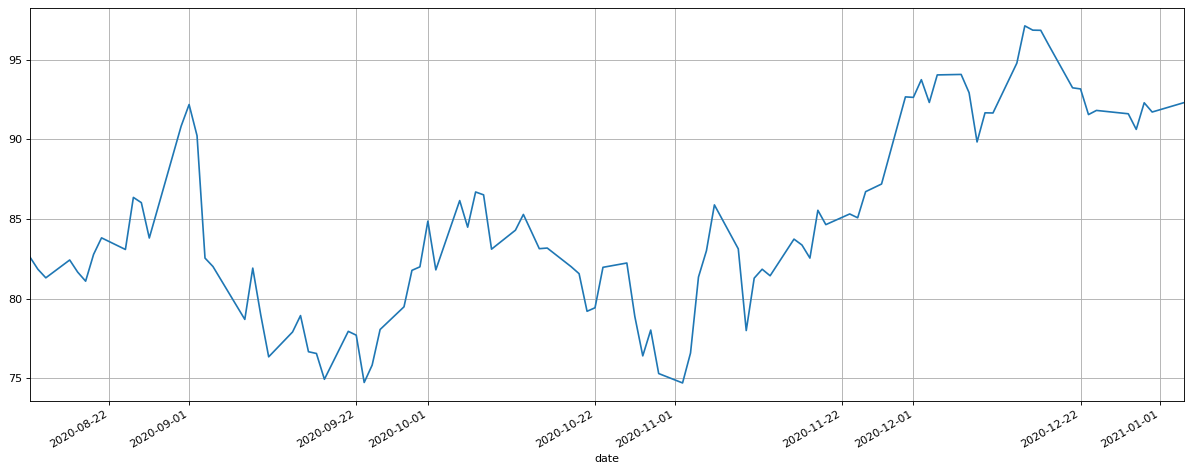

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-01-04,92.11,96.06,90.9150,92.30,51802552.0
2020-12-31,92.10,92.30,90.8700,91.71,24930684.0
2020-12-30,90.78,92.85,90.1900,92.29,25844973.0
2020-12-29,91.66,92.46,89.4301,90.62,31748211.0
2020-12-28,92.93,93.14,90.8200,91.60,30512512.0


In [7]:
# Visualization
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
amd_data['4. close'].plot()
plt.tight_layout()
plt.grid()
plt.show()

#pprint(amd_data.head(5))
amd_data.head(5)

In [8]:
#get last 5 close of day returns for each stock
w = well_data['4. close'].tail(5).to_numpy()
x = amd_data['4. close'].tail(5).to_numpy()
y = lrcx_data['4. close'].tail(5).to_numpy()
z = vno_data['4. close'].tail(5).to_numpy()

print("WELL:", w)
print("AMD:", x)
print("LRCX:", y)
print("VNO:", z)

WELL: [54.94 55.98 56.75 55.99 56.91]
AMD: [81.66 82.42 81.3  81.84 82.61]
LRCX: [374.57 379.08 373.64 377.02 381.52]
VNO: [34.68 35.18 35.58 35.38 36.81]


In [9]:
#find covariance
#WELL and AMD
cov1 = np.cov(w,x)
print("\n WELL and AMD \n", cov1)

#WELL and LRCX
cov2 = np.cov(w,y)
print("\n WELL and LRCX \n", cov2)

#WELL and VNO
cov3 = np.cov(w,z)
print("\n WELL and VNO \n", cov3)

#AMD and LRCX
cov4 = np.cov(x,y)
print("\n LRCX and AMD \n", cov4)

#AMD and VNO
cov5 = np.cov(x,z)
print("\n VNO and AMD \n", cov5)

#LRCX and VNO
cov6 = np.cov(y,z)
print("\n LRCX and VNO \n", cov6)


 WELL and AMD 
 [[0.61243 0.10077]
 [0.10077 0.29348]]

 WELL and LRCX 
 [[ 0.61243   1.008145]
 [ 1.008145 10.45348 ]]

 WELL and VNO 
 [[0.61243 0.52852]
 [0.52852 0.62708]]

 LRCX and AMD 
 [[ 0.29348   1.708505]
 [ 1.708505 10.45348 ]]

 VNO and AMD 
 [[0.29348 0.22778]
 [0.22778 0.62708]]

 LRCX and VNO 
 [[10.45348   1.738855]
 [ 1.738855  0.62708 ]]


In [10]:
#find precision matrix
#WELL and AMD
inv1 = np.linalg.inv(cov1)
print("\n WELL and AMD \n", inv1)

#WELL and LRCX
inv2 = np.linalg.inv(cov2)
print("\n WELL and LRCX \n", inv2)

#WELL and VNO
inv3 = np.linalg.inv(cov3)
print("\n WELL and VNO \n", inv3)

#AMD and LRCX
inv4 = np.linalg.inv(cov4)
print("\n LRCX and AMD \n", inv4)

#AMD and VNO
inv5 = np.linalg.inv(cov5)
print("\n VNO and AMD \n", inv5)

#LRCX and VNO
inv6 = np.linalg.inv(cov6)
print("\n LRCX and VNO \n", inv6)


 WELL and AMD 
 [[ 1.7306147  -0.59422803]
 [-0.59422803  3.61142278]]

 WELL and LRCX 
 [[ 1.94098099 -0.18719032]
 [-0.18719032  0.11371476]]

 WELL and VNO 
 [[ 5.98877573 -5.04750231]
 [-5.04750231  5.84886446]]

 LRCX and AMD 
 [[ 70.20565574 -11.47433332]
 [-11.47433332   1.97101404]]

 VNO and AMD 
 [[ 4.74515237 -1.72362507]
 [-1.72362507  2.22078095]]

 LRCX and VNO 
 [[ 0.17756502 -0.49237707]
 [-0.49237707  2.96002477]]


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


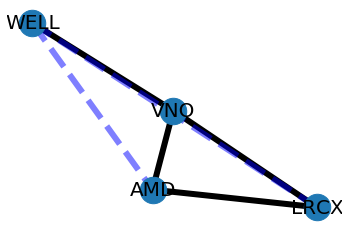

In [11]:
#create graph of stocks
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge('WELL', 'AMD', weight=0.32)
G.add_edge('WELL', 'LRCX', weight=0.035)
G.add_edge('WELL', 'VNO', weight=1.8)
G.add_edge('LRCX', 'AMD', weight=4.1)
G.add_edge('VNO', 'AMD', weight=3.31)
G.add_edge('VNO', 'LRCX', weight=1.52)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

In [12]:
#include penalty loss function
tuning = 0.8
for (u, v, d) in G.edges(data=True):
    print(d.get('weight'))
    weight = d.get('weight')
    weight = weight - (tuning*weight)
    print("New weight", weight)

0.32
New weight 0.064
0.035
New weight 0.006999999999999999
1.8
New weight 0.3599999999999999
4.1
New weight 0.8199999999999998
3.31
New weight 0.6619999999999999
1.52
New weight 0.3039999999999998


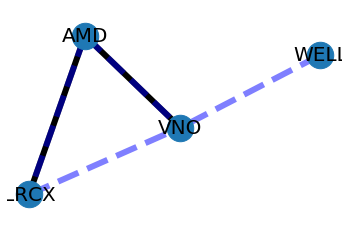

In [13]:
#replot graph
G1 = nx.Graph()

G1.add_edge('WELL', 'AMD', weight=0.064)
G1.add_edge('WELL', 'LRCX', weight=0.007)
G1.add_edge('WELL', 'VNO', weight=0.36)
G1.add_edge('LRCX', 'AMD', weight=0.82)
G1.add_edge('VNO', 'AMD', weight=0.66)
G1.add_edge('VNO', 'LRCX', weight=0.3)

elarge = [(u, v) for (u, v, d) in G1.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G1.edges(data=True) if d['weight'] >= 0.3]

pos = nx.spring_layout(G1)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G1, pos, node_size=700)

# edges
nx.draw_networkx_edges(G1, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G1, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G1, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

In [14]:
import sklearn as sklearn
from sklearn.covariance import GraphicalLasso

alpha = 0.2

#Using LASSO regularization
#
sklearn.covariance.graphical_lasso(cov1, alpha, cov_init=None, 
                                   mode='cd', tol=0.0001, enet_tol=0.0001, 
                                   max_iter=100, verbose=False, return_costs=False, 
                                   eps=2.220446049250313e-16, return_n_iter=False)



sklearn.covariance.graphical_lasso(cov6, alpha, cov_init=None, 
                                   mode='cd', tol=0.0001, enet_tol=0.0001, 
                                   max_iter=100, verbose=False, return_costs=False, 
                                   eps=2.220446049250313e-16, return_n_iter=False)

(array([[10.45348 ,  1.538855],
        [ 1.538855,  0.62708 ]]), array([[ 0.14976499, -0.36752344],
        [-0.36752344,  2.49659577]]))

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


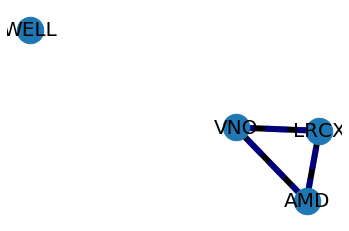

In [15]:
G2 = nx.Graph()

G2.add_edge('WELL', 'AMD', weight=0)
G2.add_edge('WELL', 'LRCX', weight=0)
G2.add_edge('WELL', 'VNO', weight=0.08)
G2.add_edge('LRCX', 'AMD', weight=1.42)
G2.add_edge('VNO', 'AMD', weight=0.56)
G2.add_edge('VNO', 'LRCX', weight=0.8)

elarge = [(u, v) for (u, v, d) in G2.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G2.edges(data=True) if d['weight'] >= 0.1]

pos = nx.spring_layout(G2)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G2, pos, node_size=700)

# edges
nx.draw_networkx_edges(G2, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G2, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G2, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()